In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
df['Maker_Model']= df['Make']+ " " + df['Model']

In [4]:
# Select features from original dataset to form a new dataframe 
df1 = df[['Engine Fuel Type','Transmission Type','Driven_Wheels','Market Category','Vehicle Size', 'Vehicle Style', 'Maker_Model']]

# For each row, combine all the columns into one column
df2 = df1.apply(lambda x: ','.join(x.astype(str)), axis=1)

# Store them in a pandas dataframe
df_clean = pd.DataFrame({'clean': df2})

# Create the list of list format of the custom corpus for gensim modeling 
sent = [row.split(',') for row in df_clean['clean']]


In [5]:
from gensim.models import Word2Vec

In [6]:
model = Word2Vec(sent, min_count=1,size= 50,workers=3, window =3, sg = 1)

In [7]:
model['Toyota Camry']

/home/phua/.virtualenvs/gensim_word2vec/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-0.09566719,  0.03777164, -0.15467833, -0.21596083,  0.08115388,
        0.25375444, -0.06153504, -0.5014795 ,  0.05663561,  0.00152793,
        0.17324947, -0.21685864,  0.05643341, -0.06750657,  0.2106954 ,
       -0.17123362,  0.05141038,  0.03154847, -0.05345152,  0.061529  ,
        0.03868457,  0.19269513,  0.00513106, -0.03270034, -0.0363486 ,
       -0.0977331 , -0.18229038,  0.22518474,  0.12327784,  0.15514475,
        0.12069464, -0.03932485,  0.00559239,  0.10148761,  0.15295507,
       -0.04897888, -0.152333  , -0.16414149,  0.1867867 , -0.05123843,
        0.1405448 , -0.20484343, -0.00618203, -0.03818421, -0.12669538,
       -0.21790007,  0.07165187,  0.0648052 , -0.04800787,  0.15842505],
      dtype=float32)

## Similiarity and most similar using Euclidean Distance
## However, it is not good for high dimensional data

In [8]:
model.similarity('Porsche 718 Cayman', 'Nissan Van')

/home/phua/.virtualenvs/gensim_word2vec/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.78902906

In [9]:
model.similarity('Porsche 718 Cayman', 'Mercedes-Benz SLK-Class')

/home/phua/.virtualenvs/gensim_word2vec/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.9645536

In [10]:
model.most_similar('Mercedes-Benz SLK-Class')[:5]

/home/phua/.virtualenvs/gensim_word2vec/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('BMW M6', 0.9946016073226929),
 ('Cadillac CTS-V Coupe', 0.9945895075798035),
 ('Maserati Coupe', 0.9944686889648438),
 ('BMW M4', 0.9944518804550171),
 ('Porsche Cayman', 0.9944455027580261)]

## Cosine similarity

In [11]:
import numpy as np

def cosine_distance (model, word,target_list , num) :
    cosine_dict ={}
    word_list = []
    a = model[word]
    for item in target_list :
        if item != word :
            b = model [item]
            cos_sim = np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))
            cosine_dict[item] = cos_sim
    dist_sort=sorted(cosine_dict.items(), key=lambda dist: dist[1],reverse = True) ## in Descedning order 
    for item in dist_sort:
        word_list.append((item[0], item[1]))
    return word_list[0:num]

In [12]:
Maker_Model = list(df.Maker_Model.unique()) 

In [13]:
cosine_distance (model,'Mercedes-Benz SLK-Class',Maker_Model,5)

/home/phua/.virtualenvs/gensim_word2vec/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/home/phua/.virtualenvs/gensim_word2vec/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


[('BMW M6', 0.9946017),
 ('Cadillac CTS-V Coupe', 0.99458957),
 ('Maserati Coupe', 0.9944688),
 ('BMW M4', 0.99445206),
 ('Porsche Cayman', 0.9944455)]

# T-SNE visualization

In [14]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def display_closestwords_tsnescatterplot(model, word, size):
    
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]
    close_words = model.similar_by_word(word)
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

/home/phua/.virtualenvs/gensim_word2vec/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  
/home/phua/.virtualenvs/gensim_word2vec/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':
/home/phua/.virtualenvs/gensim_word2vec/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


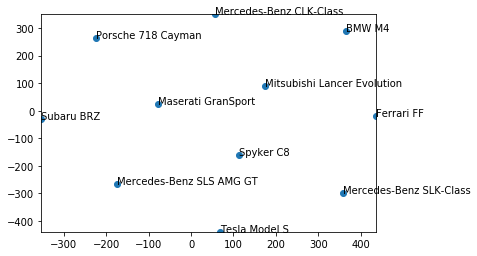

In [15]:
display_closestwords_tsnescatterplot(model, 'Porsche 718 Cayman', 50) 